## 2.1 vector and matrix computations

### 2.1.1 Vector computation

In [1]:
a = [1, 2, 3] # ベクトルに対してスカラー値を掛けると要素毎に値が掛け算されたベクトルが出力される
2 * a

3-element Vector{Int64}:
 2
 4
 6

In [2]:
b = [4, 5, 6]
a + b # ベクトルのサイズが同じであることが必要

3-element Vector{Int64}:
 5
 7
 9

In [3]:
a .* b # 対応する要素毎に掛け合わせたい場合は .* によってブロードキャストする

3-element Vector{Int64}:
  4
 10
 18

In [4]:
sum(a .* b) # 内積を行うには，上記の各要素の掛け算をsum関数で足し合わせる

32

In [5]:
a' * b # 内積は，1x3と3x1の行列の積と考えると記述がシンプルになる

32

### 2.1.2 Matrix computation

In [6]:
A = [1 2 3;
     4 5 6]
B = [10 20 30; 
     40 50 60]
A + B # 行列同士の和

2×3 Matrix{Int64}:
 11  22  33
 44  55  66

In [7]:
A = [1 2; 
     3 4;
     5 6] # 3x2行列
B = [10 20 30 40; 
     50 60 70 80] # 2x4行列　
C = A * B # 行列積(matrix product)

3×4 Matrix{Int64}:
 110  140  170  200
 230  300  370  440
 350  460  570  680

行列Cのi列j行目の要素は次式で計算される．
$$
C_{i, j} = \sum_{k = 1}^{K} A_{i, k} B_{k, j}
$$

In [8]:
M = size(A, 1) # Aの行数
N = size(B, 2) # Bの列数

# M x N の行列を作成
C = [sum(A[i,:] .* B[:,j]) for i in 1:M, j in 1:N]

3×4 Matrix{Int64}:
 110  140  170  200
 230  300  370  440
 350  460  570  680

In [9]:
B * A # 左側の行列の列数と右側の行列の行数が一致していないのでエラー（Dimension Mismatch)

LoadError: DimensionMismatch: matrix A has dimensions (2,4), matrix B has dimensions (3,2)

In [10]:
A = [1 2; 
     3 4; 
     5 6]
I = [1 0 0; 
     0 1 0;
     0 0 1]
I * A # A * Iではない

3×2 Matrix{Int64}:
 1  2
 3  4
 5  6

In [11]:
A = [1 2 3;
     4 5 6]
A' # Juliaでは転置を ' で表す

3×2 adjoint(::Matrix{Int64}) with eltype Int64:
 1  4
 2  5
 3  6

In [12]:
a = [1, 2, 3]
b = [5, 7]
a * b'

3×2 Matrix{Int64}:
  5   7
 10  14
 15  21

In [13]:
f2(x, y) = 2*x + y
f2.(a, b')

3×2 Matrix{Int64}:
  7   9
  9  11
 11  13

In [14]:
A = [1 2; 
     3 4]
B = inv(A) # 逆行列はinv関数

2×2 Matrix{Float64}:
 -2.0   1.0
  1.5  -0.5

In [15]:
A * B # 数値誤差の発生

2×2 Matrix{Float64}:
 1.0          0.0
 8.88178e-16  1.0

In [16]:
B * A # 数値誤差の発生

2×2 Matrix{Float64}:
 1.0          0.0
 2.22045e-16  1.0

In [17]:
println(B) # 数値誤差の確認

[-1.9999999999999996 0.9999999999999998; 1.4999999999999998 -0.4999999999999999]


In [18]:
A = Rational{Int}[1 2;
                  3 4]
B = inv(A)
println(A * B)
println(B * A)

Rational{Int64}[1//1 0//1; 0//1 1//1]
Rational{Int64}[1//1 0//1; 0//1 1//1]


In [19]:
A = Rational{Int}[1 2; 
                  3 4]
sol = inv(A) * [-1, 1]

2-element Vector{Rational{Int64}}:
  3//1
 -2//1

## 2.2 Computing Statistics

In [20]:
using Statistics

In [21]:
X = rand(5)

5-element Vector{Float64}:
 0.45855096701540676
 0.7227746038422554
 0.0017847988883038512
 0.6917957227039702
 0.8306982028229118

In [22]:
Y = rand(2, 5)

2×5 Matrix{Float64}:
 0.0263971  0.13458    0.902491   0.71189    0.257083
 0.305846   0.0249597  0.0358268  0.0330126  0.12025

### 2.2.1 合計，平均

合計（sum）
$$
s = \sum_{n=1}^{N} x_n
$$
平均（mean）
$$
\mu = \cfrac{1}{N} \sum_{n=1}^{N} x_n
$$

In [23]:
println(sum(X))
println(mean(X))

2.705604295272848
0.5411208590545696


In [24]:
println(sum(Y))
println(sum(Y, dims=1))
println(sum(Y, dims=2))
println(mean(Y))
println(mean(Y, dims=1))
println(mean(Y, dims=2))

2.552337224627971
[0.3322436313811281 0.15953992013257146 0.9383176991892506 0.7449030388288148 0.37733293509620647]
[2.032441695598087; 0.5198955290298846;;]
0.2552337224627971
[0.16612181569056406 0.07976996006628573 0.4691588495946253 0.3724515194144074 0.18866646754810323]
[0.4064883391196174; 0.10397910580597691;;]


### 2.2.2 分散，標準偏差

分散（Variance）
$$
v = \cfrac{1}{N-1} \sum_{n=1}^{N} (x_n - \mu)^2
$$
標準偏差（standard deviation)
$$
\sigma = \sqrt{v}
$$

In [25]:
println(std(X))
println(std(X).^2)
println(var(X))

0.33062713455723525
0.10931430210552814
0.10931430210552816


### 2.2.3 共分散

共分散（covariance）

D次元のベクトルを$\rm{y_n}$とし，これが$\rm{Y} = \{\rm{y_1}, \rm{y_2}, \dots, \rm{y_N}\}$のように並んでいるとする．

$i$次元目と$j$次元目の共分散は以下のように定義される（$\mu_i$および$\nu_j$はそれぞれの次元の平均値）
$$
{\rm{Cov}}_{i, j} = \cfrac{1}{N-1} \sum_{n=1}^{N} (x_{n,i} - \mu_i)(x_{n,j} - mu_{j})
$$

In [26]:
cov(Y, dims=1)

5×5 Matrix{Float64}:
  0.039046   -0.0153167   -0.121094   -0.094856   -0.019119
 -0.0153167   0.00600833   0.0475021   0.0372095   0.00749986
 -0.121094    0.0475021    0.375553    0.294179    0.0592942
 -0.094856    0.0372095    0.294179    0.230437    0.0464465
 -0.019119    0.00749986   0.0592942   0.0464465   0.00936167

In [27]:
cov(Y, dims=2)

2×2 Matrix{Float64}:
  0.145004   -0.0282875
 -0.0282875   0.0142351

## 2.3 Parameters of statistics and probability distributions

In [28]:
using Distributions
μ = 1.5
σ = 2.0
Z = rand(Normal(μ, σ), 10000)
Z

10000-element Vector{Float64}:
  2.6280931023860257
  0.5065449545154406
  3.1740837004698412
  1.5334275456565574
  1.3844485214821514
  0.9853224474492851
  3.82404934775892
  1.2733841446629555
  2.005466448917052
  3.6706771428236915
  0.6695784905900902
  2.990265345046288
  2.129588385639398
  ⋮
  0.3156477909217552
  2.374662871918768
  6.363157339794713
  3.4959203661872524
  2.925779368506904
  2.015406782758061
 -0.9259153877717852
  1.244914029723442
  1.8316039500402828
  0.6176571195832153
  0.8920311048816365
 -0.2412692513131771

In [29]:
println(mean(Z))
println(std(Z))

1.5159637432057727
2.0005504854773624


## 2.4 微分計算

### 2.4.1 1変数関数の微分

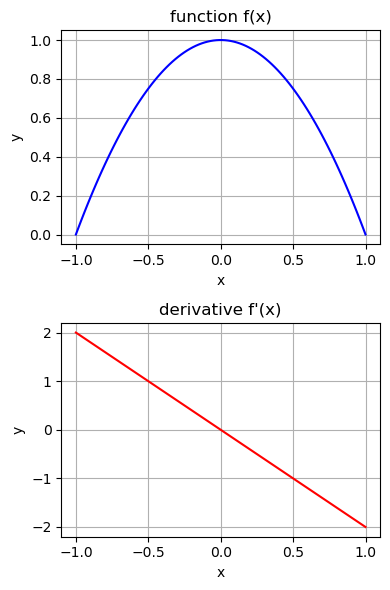

In [41]:
using PyPlot

# f(x)を二次関数として定義
f(x) = -(x + 1)*(x - 1)

# hを微小な値として設定（10のマイナス10乗）
h = 1.0e-10

# 導関数f'の近似式
fd(a) = (f(a + h) - f(a)) / h # f'だと"syntax: invalid function name "f'""となりエラー

# 関数の可視化範囲
xs = range(-1, 1, length = 100)

fig, axes = subplots(2, 1, figsize=(4, 6))

# 関数のプロット
axes[1].plot(xs, f.(xs), "b")
axes[1].grid()
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].set_title("function f(x)")

# 導関数のプロット
axes[2].plot(xs, fd.(xs), "r")
axes[2].grid()
axes[2].set_xlabel("x"), axes[2].set_ylabel("y")
axes[2].set_title("derivative f'(x)")

tight_layout()

### 2.4.2 多変数関数の微分

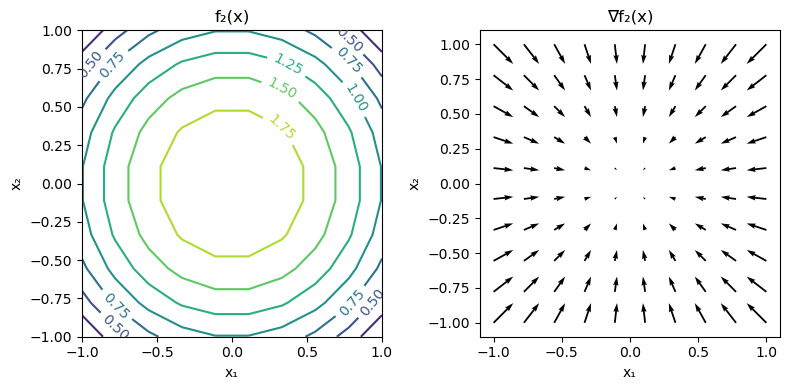

In [49]:
# グラフを可視化する際の解像度
L = 10

# f₂(x)を可視化する範囲
xs₁ = range(-1, 1, length = L)
xs₂ = range(-1, 1, length = L)

# 2変数関数の定義
f₂(x) = -(x .+ 1)'*(x .- 1)

# 2変数関数の勾配
∇f₂(x) = -2x

fig, axes = subplots(1, 2, figsize = (8, 4))

# 関数の等高線図の可視化
cs = axes[1].contour(xs₁, xs₂, [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')
axes[1].clabel(cs, inline = true)
axes[1].set_xlabel("x₁"), axes[1].set_ylabel("x₂")
axes[1].set_title("f₂(x)")

# 勾配ベクトルの計算と可視化
vec1 = [∇f₂([x₁, x₂])[1] for x₁ in xs₁, x₂ in xs₂]
vec2 = [∇f₂([x₁, x₂])[2] for x₁ in xs₁, x₂ in xs₂]

axes[2].quiver(repeat(xs₁, 1, L), repeat(xs₂', L, 1), vec1, vec2)
axes[2].set_xlabel("x₁"), axes[2].set_ylabel("x₂")
axes[2].set_title("∇f₂(x)")

tight_layout()